<a href="https://colab.research.google.com/github/FMurunga/DataScience-Projects/blob/main/Stroke_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [ ]:
#Healthcare Stroke dataset
# import pandas
# mount dataset from google drivve
# data = pandas.read_csv('/content/gdrive/My Drive/healthcare-dataset-stroke-data.csv')
# data

In [ ]:
#import from local machine
from google.colab import files
uploaded = files.upload()
#wrap your uploaded bytes in an io.StringIO since read_csv expects a file-like object.
import pandas as pd
import io
#read the files into a dataframe
data=pd.read_csv(io.StringIO(uploaded['healthcare-dataset-stroke-data.csv'].decode('utf-8')))
data

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()
## Showing information about datase
data.describe()
## Showing the dataset's statistical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
data.drop("id",inplace=True,axis=1)

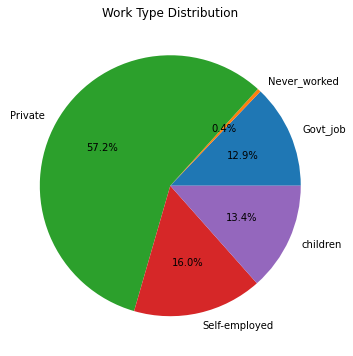

In [ ]:
#1.PIE CHART SHOWING THE DISTRIBUTION OF WORK TYPES
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10,6))
data.groupby("work_type").size().plot(kind='pie', autopct='%1.1f%%')
ax.set_title("Work Type Distribution")
ax.set_ylabel('')
plt.show()

A huge number of the people in this data work in the private sector taking 57.2%

Very few people have never worked i.e 0.4% of the population


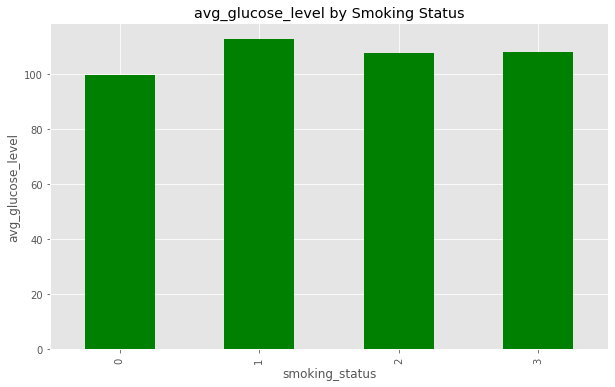

In [ ]:
#2.Bar graph to show the credit limit of the clients by marital status
import matplotlib.pyplot as plt
plt.style.use('ggplot')
_, ax = plt.subplots(figsize=(10,6))
#Use a categorical and a nominal variable
data.groupby("smoking_status")['avg_glucose_level'].mean().plot(kind='bar', color='green')
ax.set_title("avg_glucose_level by Smoking Status")
ax.set_ylabel('avg_glucose_level')
ax.set_xlabel('smoking_status')
plt.show()

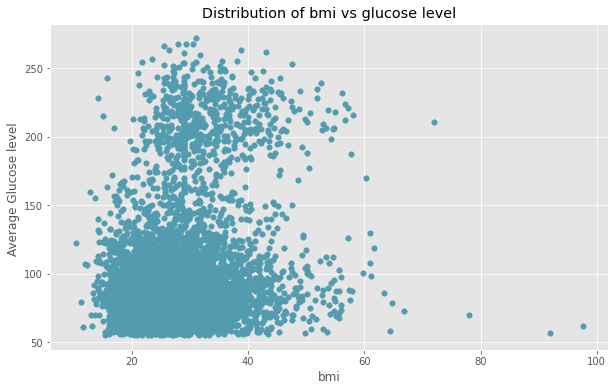

In [ ]:
#3.scatter plot
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['bmi'], data['avg_glucose_level'],s = 30, color = '#539caf', alpha = 1.00)
ax.set_title('Distribution of bmi vs glucose level')
ax.set_xlabel('bmi')
ax.set_ylabel('Average Glucose level ')
plt.show()

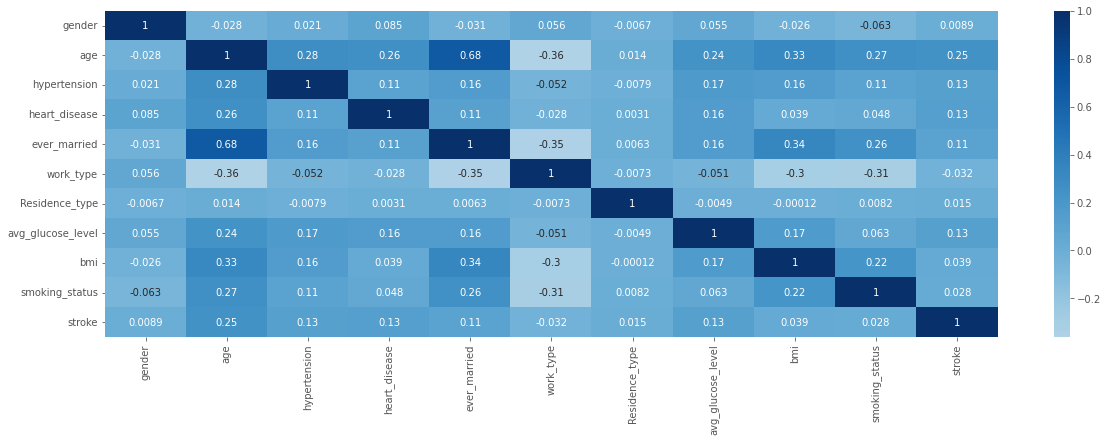

In [ ]:
#4.HeatMap
import seaborn as sn
fig, ax = plt.subplots(figsize=(20,6))
sn.heatmap(data.corr(),center=0,cmap='Blues',annot=True)
plt.show()

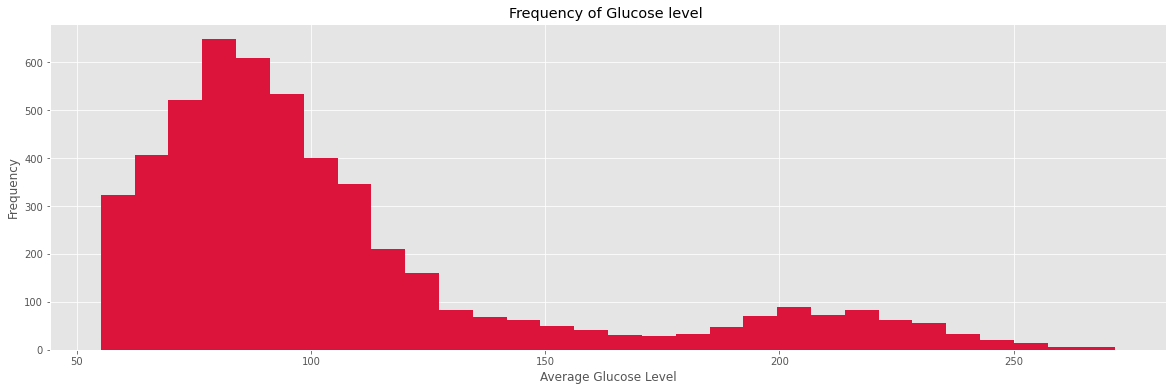

In [ ]:
#5.Histogram
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(20,6))
ax.hist(data['avg_glucose_level'], color='#DC143C', bins=30)
ax.set_title('Frequency of Glucose level ')
ax.set_xlabel('Average Glucose Level')
ax.set_ylabel('Frequency')
plt.show()

No handles with labels found to put in legend.


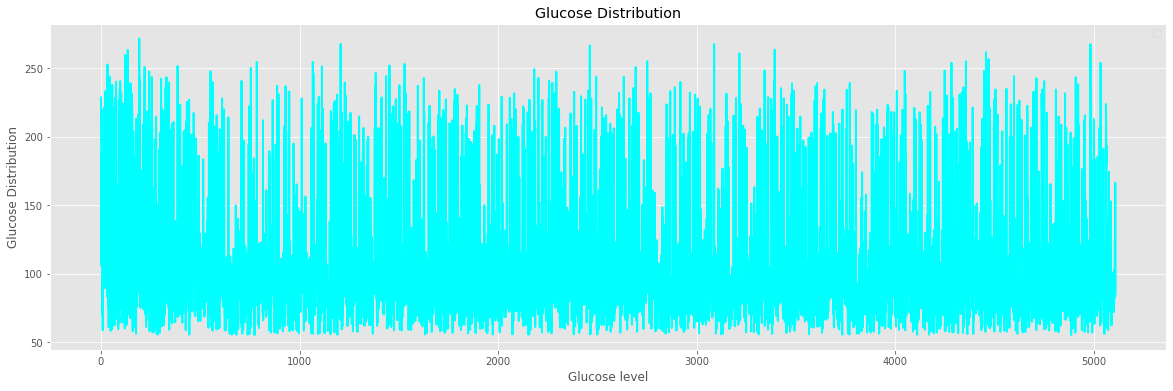

In [ ]:
#6.Density Histogram
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(20,6))
ax.plot(data['avg_glucose_level'], color='#00FFFF', lw=2)
ax.set_title('Glucose Distribution')
ax.set_xlabel('Glucose level')
ax.set_ylabel('Glucose Distribution')
ax.legend(loc='best')
plt.show()

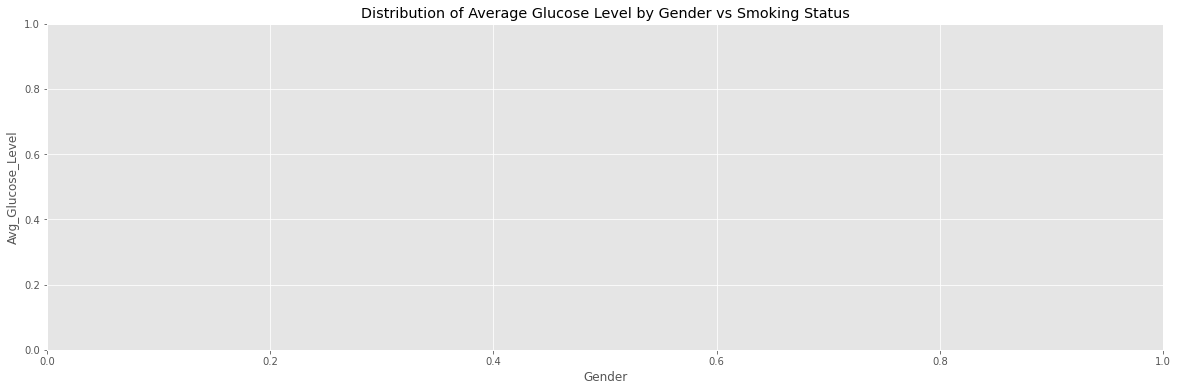

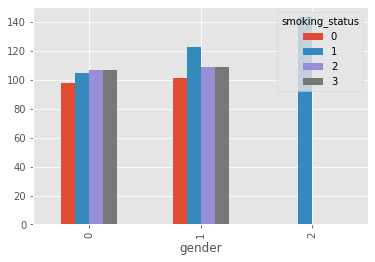

In [ ]:
#7.Stacked Bar Graph
#import matplotlib.pyplot as plt
plt.style.use('ggplot')
_, ax = plt.subplots(figsize=(20,6))
data.groupby(['gender','smoking_status'])['avg_glucose_level'].mean().unstack().plot(kind='bar', stacked=False)
ax.set_title("Distribution of Average Glucose Level by Gender vs Smoking Status")
ax.set_ylabel('Avg_Glucose_Level')
ax.set_xlabel('Gender')
plt.show()

In [ ]:
#checks the count for stroke: the no of times it has occurred on the patients on the dataset 
data['stroke'].value_counts()

#outcome: 4861 patients did not have a stroke while 249 patients on the dataset have had a stroke 

0    4861
1     249
Name: stroke, dtype: int64

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


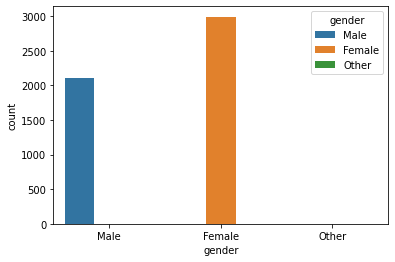

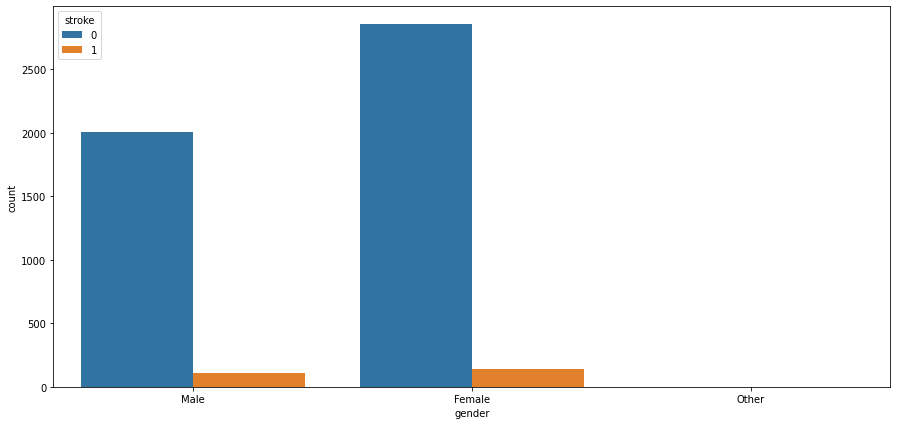

In [ ]:
#1. Analysis of how gender affects stroke
import matplotlib.pyplot as plt
#This gives us information about it's unique values and count of each value.
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())
import seaborn as sn
#Plot a count plot which will help us to see count of values in each unique category.
sn.countplot(data=data,x='gender',hue='gender')
plt.figure(figsize=(15,7))
# This plot will help to analyze how gender will affect chances of stroke.
sn.countplot(data=data,x='gender',hue='stroke')
#Observation: The dataset is imbalanced but there is no much difference in stroke rate concerning gender

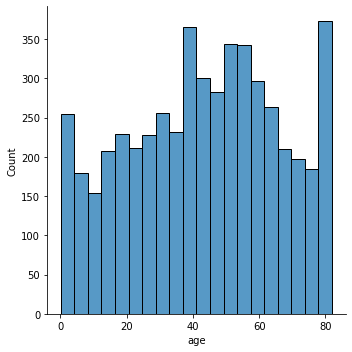

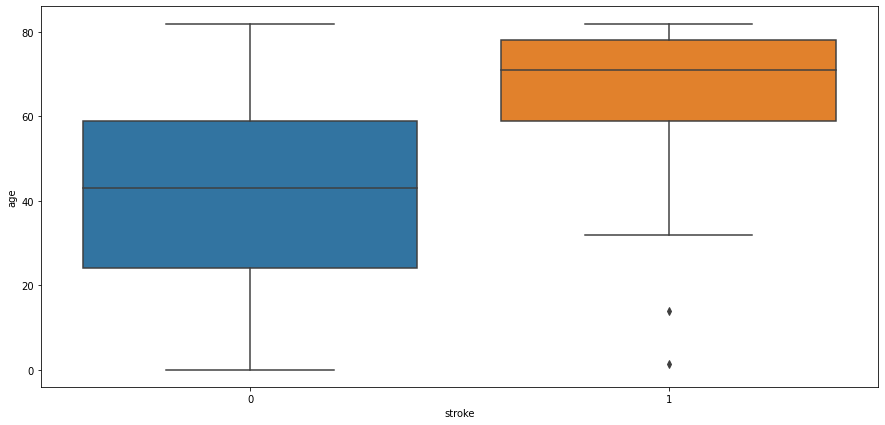

In [ ]:
#2.Analysis on how age influences stroke
# Returns number of unique values in this attribute i.e age
data['age'].nunique()
# Plot a distribution plot of variable age
sn.displot(data['age'])

plt.figure(figsize=(15,7))
sn.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke
#Observation:People Aged 60years and above tend to have stroke. 
#Some outliers can be observed for people aged 20 and below also having stroke events, it could be as a result of lifestyle or false stroke
#Also people aged below 60years are not having stroke


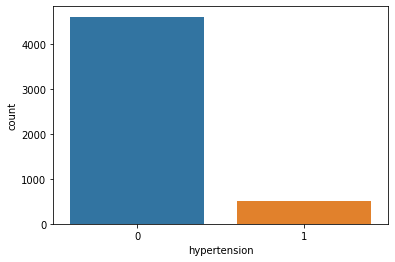

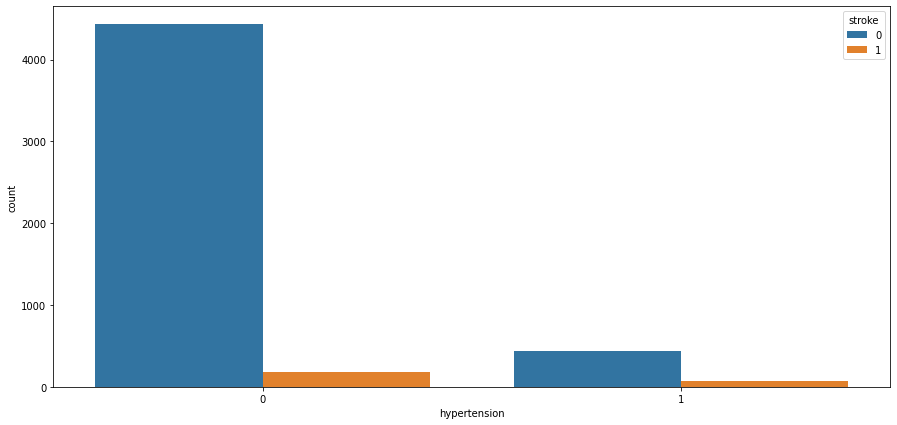

In [ ]:
#3.Analysis on how hypertesnsion influences stroke
#Hypertension is a high blood pressure condition and it does contribute to stroke

data['hypertension'].nunique() #Returns number of unique values in this attribute

#Plot a distribution plot of hypertesion variable
sn.countplot(data=data,x='hypertension')
plt.figure(figsize=(15,7))
# Above code will plot a boxplot of variable age with respect of target attribute stroke
sn.countplot(data=data,x='hypertension',hue='stroke')


From the dataset it is clear that there are very few hypertension records

Unique values of heart disease 
 2
Value count of heart disease attribute
 0    4834
1     276
Name: heart_disease, dtype: int64


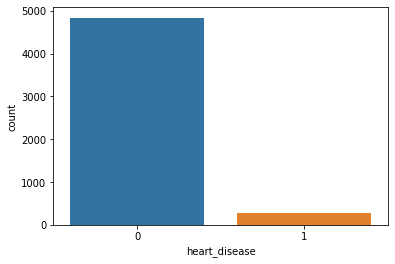

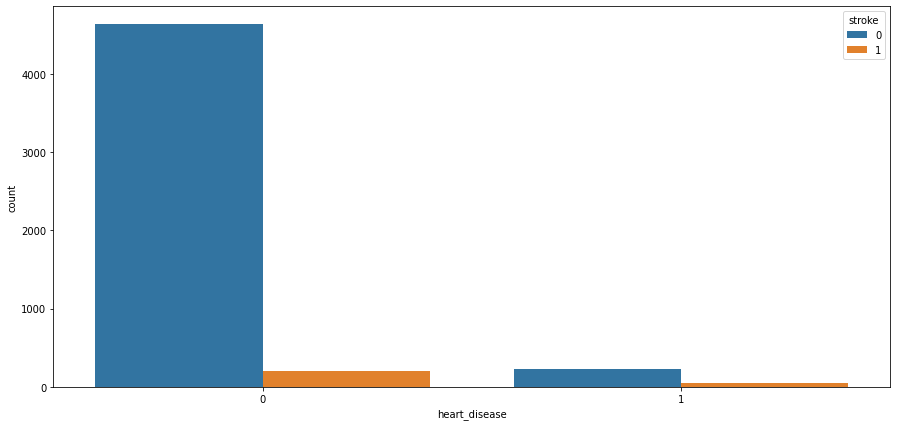

In [ ]:
#4.Heart Disease Analysis
#People who have a history of heart disease have a higher risk of getting a stroke
print('Unique values of heart disease \n',data['heart_disease'].nunique())
print('Value count of heart disease attribute\n',data['heart_disease'].value_counts())
#Plot a countplot of heart disease
sn.countplot(data=data, x='heart_disease')
plt.figure(figsize=(15,7))
#Distribution of heart disease with stroke
sn.countplot(data=data,x='heart_disease', hue='stroke')
#Observation: Despite the imbalanced dataset it can be noted that heart disease doesn't affect stroke

Unique values of Ever married attribute 
 2
Value Count of the Ever married attribute 
 Yes    3353
No     1757
Name: ever_married, dtype: int64


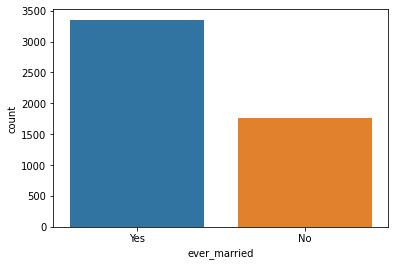

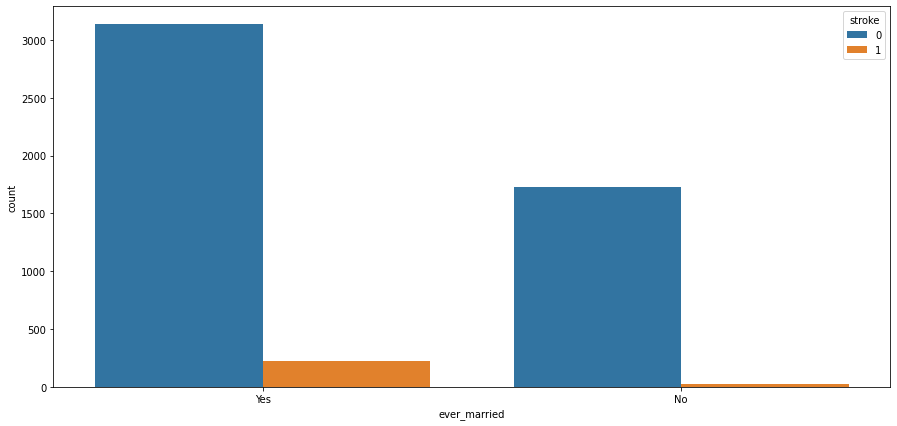

In [ ]:
#4.Ever Married attribute Analysis
print('Unique values of Ever married attribute \n',data['ever_married'].nunique())
print('Value Count of the Ever married attribute \n',data['ever_married'].value_counts())

sn.countplot(data=data, x='ever_married')
plt.figure(figsize=(15,7))

sn.countplot(data=data, x='ever_married', hue='stroke')
#Observation: People who are married have a higher stroke rate

Unique values in work type: 
 5
Value count in work type: 
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


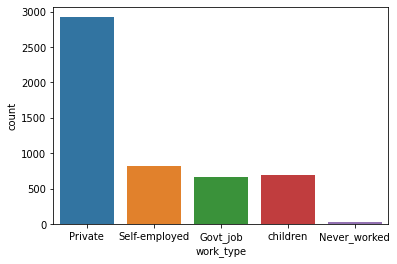

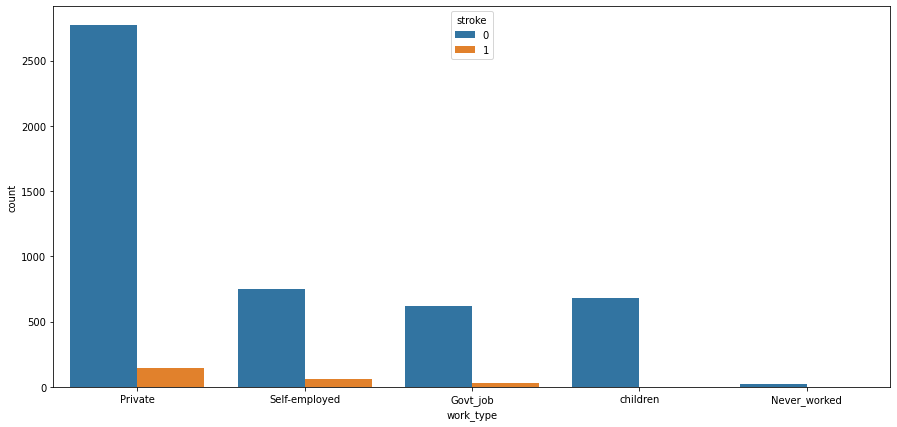

In [ ]:
#5.Work type attribute analysis on how the variable affects the chances of getting a stroke
#Different work sectors pose different challenges which in turn leads to stress and stress could in turn lead to a stroke
print('Unique values in work type: \n', data['work_type'].nunique())
print('Value count in work type: \n', data['work_type'].value_counts())
sn.countplot(data=data, x='work_type')
plt.figure(figsize=(15,7))
sn.countplot(data=data, x='work_type', hue='stroke')


Observation: People who work in the private sector have a higher risk of getting a stroke and people who have never worked have a lesser risk of getting a stroke

Unique values are:
 2
Value Count:
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


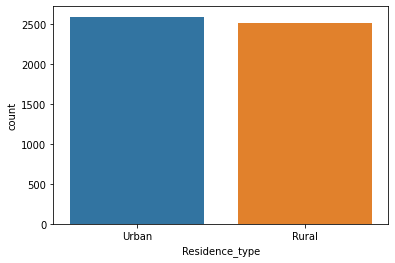

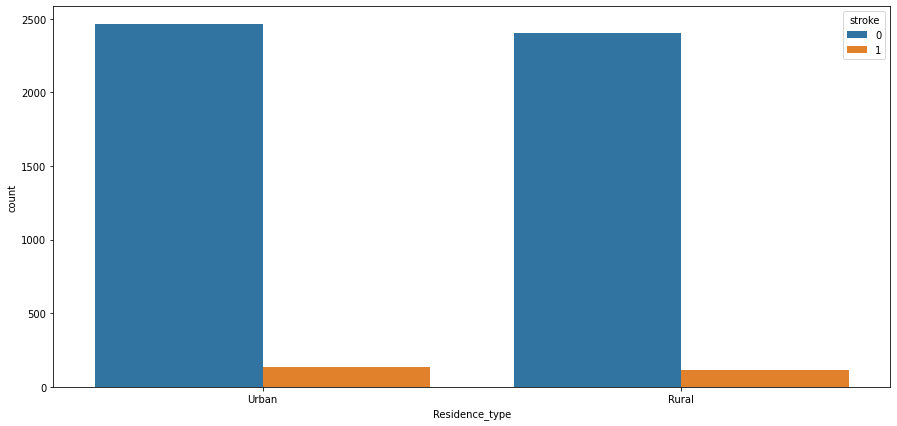

In [ ]:
#6.Residence type attribute analysis on its contribution to stroke occurance
print('Unique values are:\n',data['Residence_type'].nunique())
print('Value Count:\n',data['Residence_type'].value_counts())

sn.countplot(data=data, x='Residence_type')
plt.figure(figsize=(15,7))

sn.countplot(data=data, x='Residence_type', hue='stroke')

Observation: There is no much difference between both values in the attribute, therefore it has no use in this analysis and can be discarded

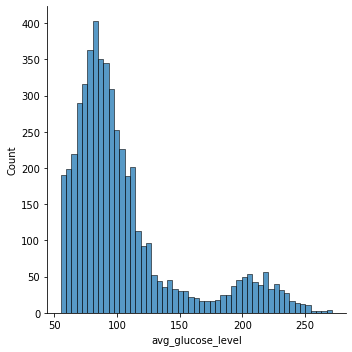

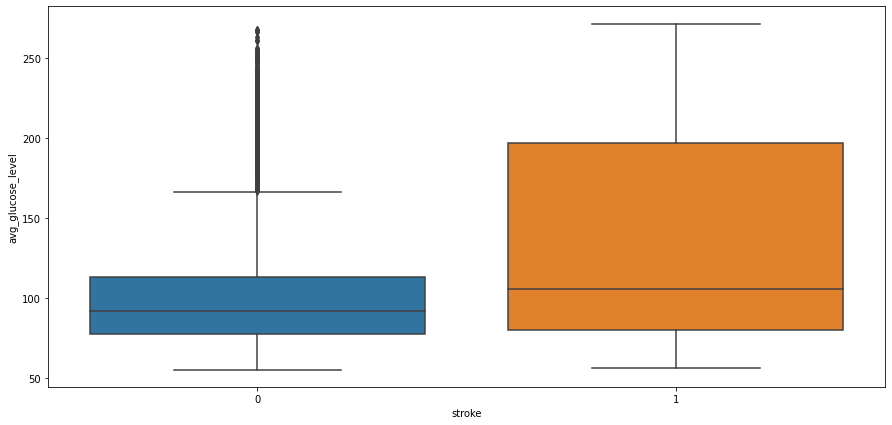

In [ ]:
#7.Average Glucose level: tells us the average level of glucose in a patient's body and how it affects the chances of having a stroke
data['avg_glucose_level'].nunique()
sn.displot(data['avg_glucose_level'])
           
plt.figure(figsize=(15,7))
sn.boxplot(data=data,x='stroke',y='avg_glucose_level')

Observation: People with a stroke have an average glucose level of more than 100. There are also some outliers in the records of patients without a stroke but it may be a genuine record

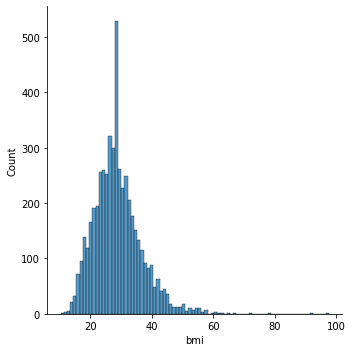

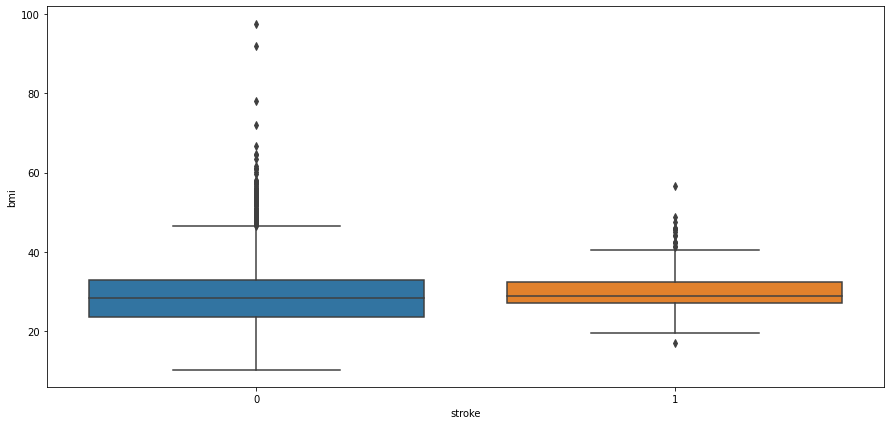

In [ ]:
#Get the mean of the BMI
mean_bmi = data['bmi'].mean()

data['bmi'].fillna(mean_bmi, inplace=True)

data.isnull().sum()

data['bmi'].nunique()
sn.displot(data['bmi'])
           
plt.figure(figsize=(15,7))
sn.boxplot(data=data,x='stroke',y='bmi')

Observation: There is no identifier of how bmi affects stroke

Unique values are:
 4
Value Count:
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


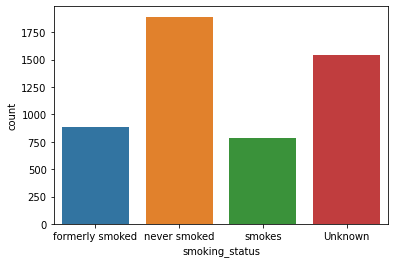

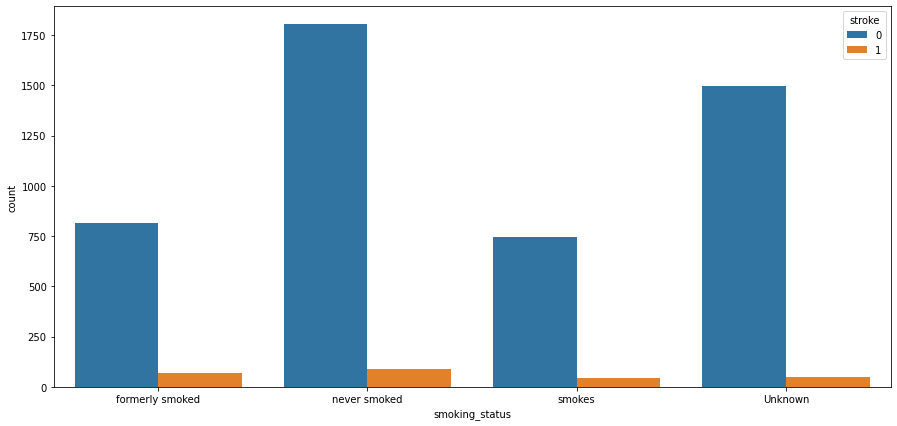

In [ ]:
#8. Smoking Status analyis on how it affects stroke
print('Unique values are:\n',data['smoking_status'].nunique())
print('Value Count:\n',data['smoking_status'].value_counts())

sn.countplot(data=data, x='smoking_status')
plt.figure(figsize=(15,7))

sn.countplot(data=data, x='smoking_status', hue='stroke')

Observation: there is no much difference in stroke occurance based on whether a person smokes or doesn't smoke

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


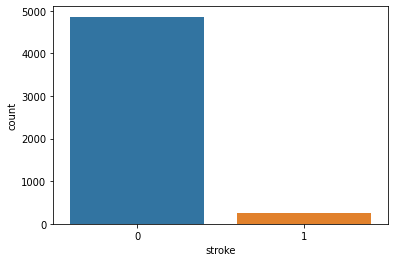

In [ ]:
#9.Stroke: the target variable that tells us whether patients have chances of getting a stroke
# Unique Value of stroke variabble and its count
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

#Stroke Count plot
sn.countplot(data=data,x='stroke')


**Feature Engineering**
The dataset comprises of both numeric and categorical variables and ML only understands numeric values therefore we need to encode categorical variables using Labelencoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to n-1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Print the columns
cols=data.select_dtypes(include=['object']).columns
#Initialize labelencoder object
le= LabelEncoder()
#transforming categorical variables into numeric
data[cols]=data[cols].apply(le.fit_transform)
print(data.head(10))


   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237 

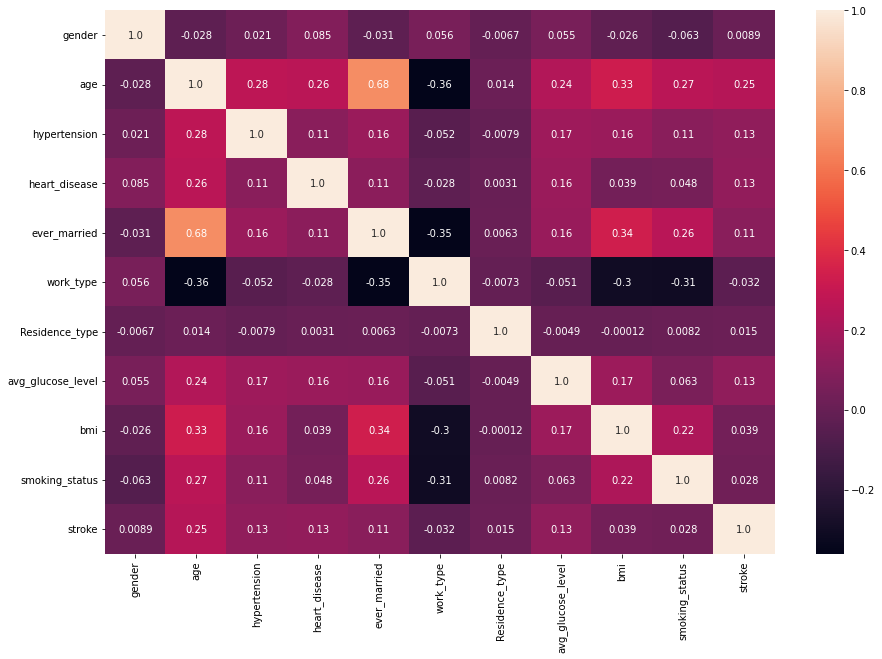

In [ ]:
#Correlation
plt.figure(figsize=(15,10))
sn.heatmap(data.corr(),annot=True,fmt='.2')

Observation
The variables showing an effective correlation are age,hypertesion,ever_married and avg_glucose_level.

Check the features using SelectKB and F_Classif

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In the above result, we can see that age is a highly correlated variable and then it gets decreasing. Keeping the threshold score as 50. Resulting in the same features from the the heatmap havea higher corelation i.e age,heart_disease,glucose_level,hypertension and ever_married

In [ ]:
#prints the attributes with an fscore of greater than 50
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


**Splitting**
Split data into training and testing data for training and testing classification models

In [ ]:
from sklearn.model_selection import train_test_split
#Split data
x_train,x_test,y_train,y_test=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)
#Check Shape of data
x_train.shape,x_test.shape,y_train.shape, y_test.shape


((3832, 5), (1278, 5), (3832,), (1278,))

Balancing the dataset
Our data is imbalanced and thus use SMOTE(Synthetic Minority Oversampling Technique) technique to balance the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)
x_test,y_test=smote.fit_resample(x_test,y_test)

print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)

(7296, 5) (7296,) (2426, 5) (2426,)


Models Creation

1.SVC Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix,precision_score,recall_score
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1213
           1       0.76      0.82      0.79      1213

    accuracy                           0.78      2426
   macro avg       0.78      0.78      0.78      2426
weighted avg       0.78      0.78      0.78      2426

Confusion Matrix:
 [[892 321]
 [218 995]]
F1 score:
 0.7868722815342032
Training Score:
 75.75383771929825


2.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score, f1_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)



Classification Report is:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75      1213
           1       0.86      0.47      0.61      1213

    accuracy                           0.70      2426
   macro avg       0.75      0.70      0.68      2426
weighted avg       0.75      0.70      0.68      2426

Confusion Matrix:
 [[1117   96]
 [ 638  575]]
F1 score:
 0.6104033970276008
Training Score:
 99.98629385964912


3. Logistic Regression
 LR is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, r2_score,f1_score
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Training Score:\n",lr.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1213
           1       0.78      0.85      0.82      1213

    accuracy                           0.81      2426
   macro avg       0.81      0.81      0.81      2426
weighted avg       0.81      0.81      0.81      2426

Confusion Matrix:
 [[ 924  289]
 [ 179 1034]]
F1 score:
 0.8154574132492113
Training Score:
 77.65899122807018


4.XGB Classifier


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, r2_score,f1_score
xgb = XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(x_train,y_train)
y_pred =xgb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:\n",f1_score(y_test,y_pred))
print("Training Score:\n",lr.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      1213
           1       0.79      0.89      0.84      1213

    accuracy                           0.83      2426
   macro avg       0.83      0.83      0.83      2426
weighted avg       0.83      0.83      0.83      2426

Confusion Matrix:
 [[ 922  291]
 [ 129 1084]]
F1 score:
 0.8377125193199382
Training Score:
 77.65899122807018


Since this is an imbalanced dataset, based on the f1 score Logistic Regression performed better than other models

In [ ]:

predictions = lr.predict(x_test)
print('Model Predictions', predictions)
print('Expected', y_test)
#NB:Models are not always right

Model Predictions [1 0 0 ... 1 0 1]
Expected 0       0
1       0
2       0
3       0
4       0
       ..
2421    1
2422    1
2423    1
2424    1
2425    1
Name: stroke, Length: 2426, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
x,y = plt.subplots()
y.plot(y_test, y_test,color='blue')
y.scatter(y_test,predictions, color='red')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.show()

newperson = [[]]
predicted = lr.predict(newperson)
print('Predicted Age', predicted)
